## 그래픽 인자 조정
 <!-- 2-3 -->

In [1]:
import numpy as  np
import matplotlib.pyplot as plt 
from sklearn.datasets  import load_wine
# load_boston: 보스톤 집값 데이터
# load_iris: 아이리스 붓꽃 데이터
# load_diabetes: 당뇨병 환자 데이터
# load_digits: 손글씨 데이터
# load_linnerud: multi-output regression 용 데이터
# load_wine: 와인 데이터
# load_breast_cancer: 위스콘신 유방암 환자 데이터

In [10]:
rdata = load_wine()
print(rdata.keys())
rdata.get('data')

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [20]:
x = rdata.get("data")
y = rdata.get("target")
x_names = rdata.get("feature_names")
y_names= rdata.get("target_names")

(178, 13)

설명변수(x)의 목록은 다음과 같습니다. 
- 0) Alcohol
- 1) Malic acid
- 2) Ash
- 3) Alcalinity of ash  
- 4) Magnesium
- 5) Total phenols
- 6) Flavanoids
- 7) Nonflavanoid phenols
- 8) Proanthocyanins
- 9) Color intensity
- 10) Hue
- 11) OD280/OD315 of diluted wines
- 12) Proline(class: 0,1,2)

반응변수(y)는 세개의 범주로 이루어져있습니다.

먼저 설명변수 데이터인 x 자료들간의 관계를 살펴봅니다. 손쉬운 방법으로 산점도를 확인하는 것이 있습니다. 여기서는  0번과 1번 변수 *alcohol*과 *malic_acid*의 관계를 살펴보겠습니다.

In [13]:
x_names[:2]

['alcohol', 'malic_acid']

Text(0.5, 1.0, 'scatter plot of alcohol and malic_acid')

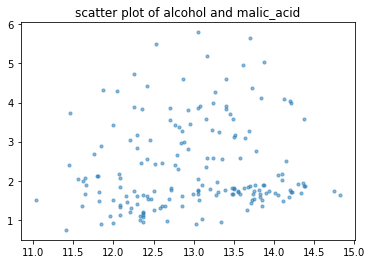

In [7]:
fig, ax = plt.subplots()
i = 0 ; j = 1
ax.scatter(x[:,i],x[:,j], s = 10, alpha = 0.5)
ax.set_title("scatter plot of {0} and {1}".
             format(x_names[i], x_names[j]))

0번과 9번 변수 *alcohol*과 *color_intensity*의 관계를 살펴봅시다.

In [18]:
[x_names[i] for i in [0,9]]

['alcohol', 'color_intensity']

Text(0.5, 1.0, 'scatter plot of alcohol and color_intensity')

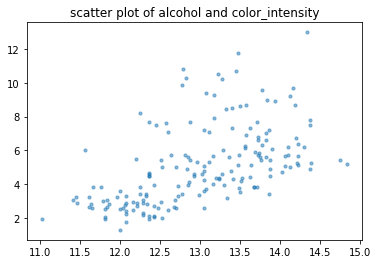

In [19]:
fig, ax = plt.subplots()
i = 0 ; j = 9
ax.scatter(x[:,i],x[:,j], s = 10, alpha = 0.5)
ax.set_title("scatter plot of {0} and {1}".
             format(x_names[i], x_names[j]))

반응변수값을 집단변수로 보고 집단별을 구분하여 *alcohol*과 *color_intensity*의 산점도를 살펴봅시다.  만약 이 산점도가 집단별로 차이가 있다면 이 두 변수는 집단의 차이를 설명할 수 있는 중요한 변수가 될 수 있을 것입니다.

Text(0.5, 1.0, 'scatter plot of alcohol and color_intensity')

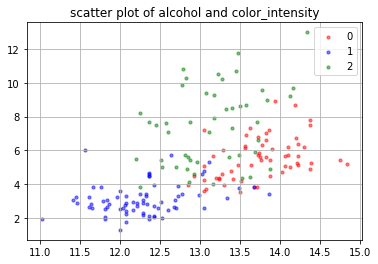

In [21]:
fig, ax = plt.subplots()
i = 0 ; j = 9
idx = (y==0)
ax.scatter(x[idx,i],x[idx,j], s = 10, alpha = 0.5,
           color = 'red', label='0')
idx = (y==1)
ax.scatter(x[idx,i],x[idx,j], s = 10, alpha = 0.5,
           color = 'blue', label='1')
idx = (y==2)
ax.scatter(x[idx,i],x[idx,j], s = 10, alpha = 0.5,
           color = 'green', label='2')
ax.legend(loc='best')
ax.grid(True)
ax.set_title("scatter plot of {0} and {1}".
             format(x_names[i], x_names[j]))

위 결과를 보면 세 집단에 대해 고려한 변수들의 중심이 꽤 많이 떨어져 있음을 확인할 수 있습니다. 만약 하나의 변수에 대해서 차이를 보고 싶다면 boxplot을 활용하는 것이 좋을 것입니다. 

Text(0.5, 1.0, 'boxplot of alcohol')

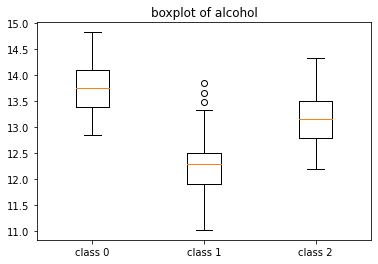

In [22]:
fig, ax = plt.subplots()
i = 0 
idx0 = (y==0)
idx1 = (y==1)
idx2 = (y==2)
ax.boxplot([x[idx0,i],x[idx1,i],x[idx2,i]], labels = 
           ['class 0', 'class 1', 'class 2'])
ax.set_title("boxplot of {0}".format(x_names[i]))

Text(0.5, 1.0, 'boxplot of color_intensity')

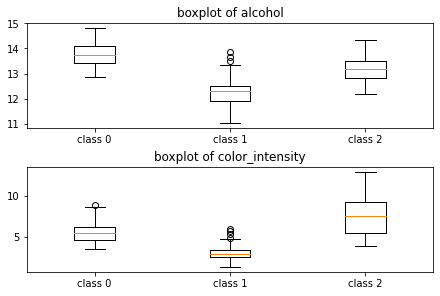

In [24]:
fig, (ax0, ax1) = plt.subplots(2,1, layout = 'constrained')
i = 0 
idx0 = (y==0)
idx1 = (y==1)
idx2 = (y==2)
ax0.boxplot([x[idx0,i],x[idx1,i],x[idx2,i]], labels = 
           ['class 0', 'class 1', 'class 2'])
ax0.set_title("boxplot of {0}".format(x_names[i]))
i = 9
ax1.boxplot([x[idx0,i],x[idx1,i],x[idx2,i]], labels = 
           ['class 0', 'class 1', 'class 2'])
ax1.set_title("boxplot of {0}".format(x_names[i]))

subplots의 layout option으로 'constrained'는 다중 플롯이 겹치지 않도록 위치를 조정하는 것으로 3장에서 좀더 자세히 다룹니다.

아래의 예를 간단한 방법으로 특정 축의 scale을 변경하는 방법을 소개합니다.  왼쪽과 오른쪽의 그림을 살펴보세요. 

왼쪽 그림은 로그노말을 따르는 어떤 데이터의 시계열 추이를 시각화 한 것입니다. 데이터가 주어진 시점에는 데이터의 분포를 정확하게 알 수 없기 때문에, 시간에 따른 패턴을 어떤 식으로 분석하는 것이 좋은지 알 수 없습니다. 

이 값에 로그를 취하여 시각화하면 오른쪽 시계열을 확인할 수 있습니다. 명확한 평균의 변화가 확인됩니다. 이러한 시각화를 위해서 데이터의 로그 변환이 필요할 것으로 보이나, 명시적인 로그변환 없이 이를 시각화 할 수 있습니다. 아래에서 그 방법을 찾아 보세요. (***set_yscale***)

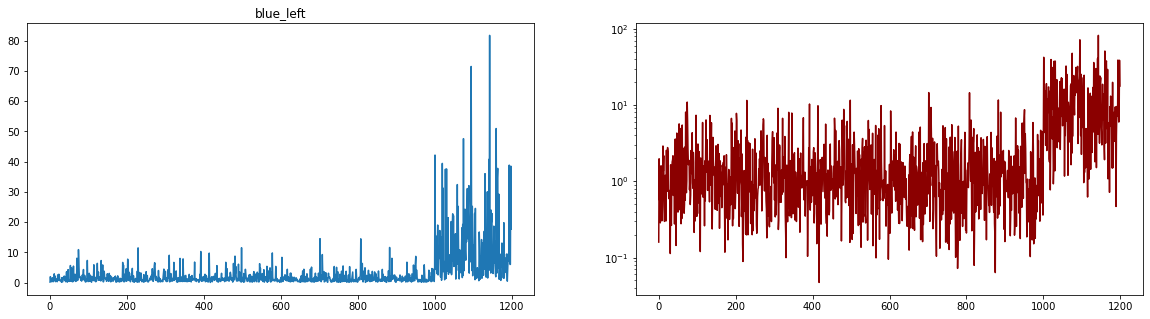

In [27]:
a = np.exp(np.random.normal(0, 1, 1000))
b = np.exp(np.random.normal(2, 1, 200))
x = np.concatenate([a,b])
fig, ax = plt.subplots(1,2, figsize = (20,5))
ax[0].plot(x, color='tab:blue')
ax[0].set_title("blue_left")
ax[1].plot(x, color = 'darkred')
ax[1].set_yscale('log')

다음으로 여러 개의 plot을 그리는 방법을 확인합니다. subplot 의 layout이 nrows=2, ncols=3이면, axes에 행렬 원소를 지정하는 방법으로 그림을 선택적으로 그릴 수 있습니다. 

Text(0.5, 1.0, 'coral_bottom_right')

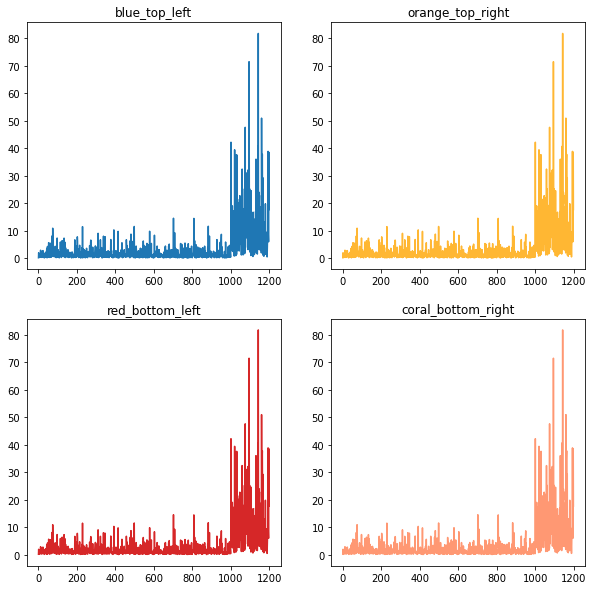

In [28]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].plot(x, color='tab:blue')
ax[0,0].set_title("blue_top_left")
ax[0,1].plot(x, color = 'orange', alpha = 0.8)
ax[0,1].set_title("orange_top_right")
ax[1,0].plot(x, color='tab:red')
ax[1,0].set_title("red_bottom_left")
ax[1,1].plot(x, color = 'coral', alpha = 0.8)
ax[1,1].set_title("coral_bottom_right")

축 위에 tick 을 지정하고 이름을 붙여봅니다. xticks 혹은 yticks를 이용하면 됩니다. 

한편 아래 예는 세로축이 다른 그래프를 그리는 방법을 보여줍니다. x축의 좌표계를 공유하는 방법으로 그립니다.

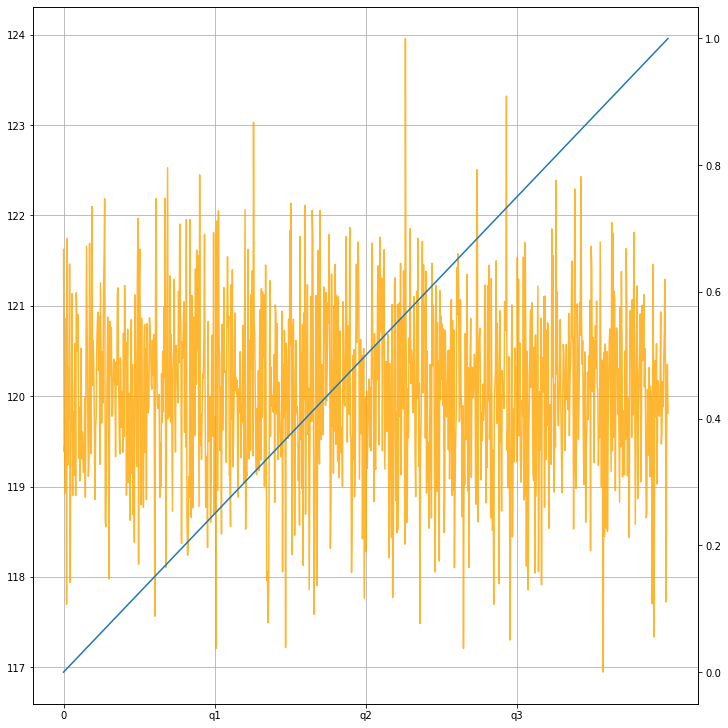

In [33]:
np.random.seed(1)
x = np.random.normal(120, 1, size = 1000)
fig, ax = plt.subplots(figsize = (10,10), layout ='constrained')
ax.plot(x, color = 'orange', alpha = 0.8)
ax.grid(True)
ax.set_xticks(np.arange(0,1000, 250), labels= [0,'q1', 'q2', 'q3'])
# 투명한 axis를 복사
ax2 = ax.twinx()
y = np.linspace(0,1,1000)
ax2.plot(y)

In [ ]:
# %%
# 날짜 위에서 처리







#%%
## 응용: 수학기호쓰기
# 2-3-3
x = np.random.normal(120, 1, size = 1000)
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(x, bins = 30, range = (115, 125), density = True,
        facecolor="silver")
ax.set_title("My histogram")
ax.set_xlabel("weight")
ax.text(x = 116, y = 0.4, s = r'$\mu = 115$')
ax.grid(True, which = 'both', axis = 'y', linestyle ='--')
ax.annotate("here", xy=(116,0), xytext = (116,0.20),
            arrowprops= {'facecolor': 'black', 'shrink': 0.05})
#%%
dict(facecolor='black', shrink=0.05)
# %%
x
